In [1]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex. tools import input_factory


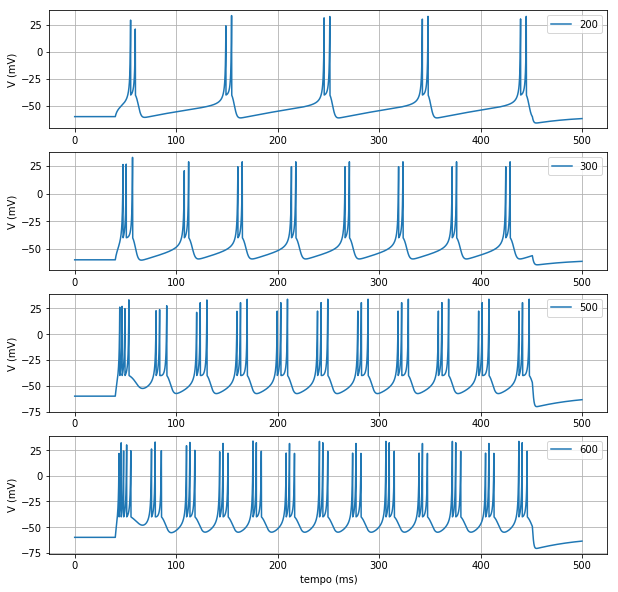

In [3]:
"""
Implements the dynamics of the exponential Integrate-and-fire model

Args:
    tau (Quantity): Membrane time constant
    R (Quantity): Membrane resistance
    v_rest (Quantity): Resting potential
    v_reset (Quantity): Reset value (vm after spike)
    v_rheobase (Quantity): Rheobase threshold
    v_spike (Quantity) : voltage threshold for the spike condition
    delta_T (Quantity): Sharpness of the exponential term
    I_stim (TimedArray): Input current
    simulation_time (Quantity): Duration for which the model is simulated
"""
v_rest= -60*b2.mV #EL
v_reset= -40*b2.mV #Vreset
conductance_L = 10*b2.nsiemens #GL
membrane_capacitance = 50*b2.pF #CM
firing_threshold = -40* b2.mV #Vth
deltaVth = 2*b2.mV

a = 0.03/(b2.ms)
b = 1*(b2.pA/b2.mV)
k = 1.5*b2.pA/(b2.mV**2)
d = 150*b2.pA 

tau_w = 200*b2.ms
v_max = 35*b2.mV

simulation_time = 500

eqs = """
dv/dt = ((k/membrane_capacitance)*(((v - v_rest)*(v - firing_threshold)))
        - (u/membrane_capacitance)
        + (input_current(t,i)/membrane_capacitance))  : volt
du/dt = (a)*(b*(v - v_rest) - u) : amp
"""

#current = 200.01 * b2.pamp
current = [200,300,500,600]
v_membrana = [None]*len(current)
for i in range(len(current)):
    
    input_current = input_factory.get_step_current(
    t_start=40, t_end=450, unit_time=b2.ms,
    amplitude=current[i]*b2.pA) 
    #dv/dt = ((k/membrane_capacitance)*(v - v_rest)*(v-firing_threshold) + (input_current(t,i)/membrane_capacitance)) - (u/membrane_capacitance)  : volt
    # differential equation of Leaky Integrate-and-Fire model
    
    neuron = b2.NeuronGroup(1, model=eqs, reset="v=v_reset; u=u+d", threshold="v>v_max", method="euler")
    neuron.v = v_rest
    neuron.u = 0*b2.pA
    
    # monitoring membrane potential of neuron and injecting current
    state_monitor = b2.StateMonitor(neuron, ["v", "u"], record=True)
    spike_monitor = b2.SpikeMonitor(neuron)
    # run the simulation
    b2.run(simulation_time*b2.ms)
    
    v_membrana[i] = state_monitor.v[0]/b2.mV
    
fig = plt.figure(figsize=(10,10))
for i in range(len(current)):
    fig.add_subplot(len(current),1,i+1)
    plt.plot(state_monitor.t/b2.ms, v_membrana[i], label=current[i])
    plt.legend(loc=1)
    plt.grid()
    plt.ylabel('V (mV)')
plt.xlabel('tempo (ms)')
plt.show()#%%
